# Task: take CAFE5 outputs and calculate the change in gene numbers (expansion and contractions)

Also, make into a tree. 

Files are called ```Base_change.tab``` or ```Significant_families.txt``` for the additions etc. 

```
.\\Cafe_twoPlus_3_levels_Aug2021                # all genes
.\\Cafe_twoPlus_3_levels_Aug2021_background     # only the background genes
.\\Cafe_twoPlus_3_levels_Aug2021_canonical      # only the canonical genes
.\\Cafe_twoPlus_3_levels_Aug2021_noncanonical   # only the noncanonical genes
```

In [1]:
import pandas as pd 
# read file

basedir = '.\\'
dirnames = ['Cafe_twoPlus_3_levels_Aug2021\\', 'Cafe_twoPlus_3_levels_Aug2021_background\\', 'Cafe_twoPlus_3_levels_Aug2021_canonical\\', 'Cafe_twoPlus_3_levels_Aug2021_noncanonical\\'] # directories to get files from 

names = ['all3', 'backg3', 'canon3', 'noncan3']

# Setup for outputs
cwd = os.getcwd()
path = cwd + '\outputTables\\' 
# print(cwd)
# print(path)
plotpath  = cwd + '\plots\\' 
# print(cwd)
# print(plotpath)


In [2]:
def readFile(baseDir, dirname, filename): # github copilot version
    """ Read in csv file from the basedir and the specific dir names into a pandas dataframe and convert all counts to integers. Return the dataframe""" 
    filepath = os.path.join(baseDir, dirname, filename) 
    return pd.read_csv(filepath, header=0, sep='\t', index_col=0, converters={'count': lambda x: int(x)})


In [3]:
""" Read all the Base_change files in."""
dfAll = readFile(basedir, dirnames[0], 'Base_change.tab')
dfBackg = readFile(basedir, dirnames[1], 'Base_change.tab')
dfCanon = readFile(basedir, dirnames[2], 'Base_change.tab')
dfNoncanon = readFile(basedir, dirnames[3], 'Base_change.tab')

In [4]:
dfNoncanon.head()

,Bimp<0>,Bter<1>,Mqua<2>,<3>,Amel<4>,Aflo<5>,<6>,<7>,Emex<8>,<9>,<10>,Ccal<11>,<12>,Hlab<13>,Dnov<14>,Lalb<15>,Mrot<16>,<17>,<18>,<19>
FamilyID,,,,,,,,,,,,,,,,,,,,
ORTHOMCL14,3,0,-1,2,-1,1,0,0,1,0,0,1,0,-1,0,0,6,0,-1,0
ORTHOMCL30,0,2,-1,0,-1,1,0,0,2,0,0,4,0,-1,0,0,0,0,-1,0
ORTHOMCL48,-1,0,3,0,-2,6,0,1,-1,1,0,0,0,-1,0,-1,-1,0,0,0
ORTHOMCL53,0,1,-3,0,0,0,0,-3,3,-1,0,0,0,0,0,-4,0,0,0,0
ORTHOMCL69,-2,3,-1,0,0,0,0,-1,3,-2,-1,0,0,2,0,-3,1,0,-1,0


In [5]:
def splitNegPos(inDF):
    """Take a dataframe where columns are the expansions (positive integers) or contractions (negative integers) for that gene family in that node. Split the df into only the numeric component vs name, and then sum the overall changes """   
    newdf=inDF.astype(int) # convert all to integers after name. 
    negs=newdf.mask(newdf>0, 0).sum() # gene family contractions df [mask when > 0]
    poss=newdf.mask(newdf<0, 0).sum() # gene family expansions [mask if < 0]
    return pd.DataFrame(negs), pd.DataFrame(poss) # make df


In [6]:

negA, posA = splitNegPos(dfAll)
negBackg, posBackg = splitNegPos(dfBackg)
negCan, posCan = splitNegPos(dfCanon)
negNoncan, posNoncan = splitNegPos(dfNoncanon)

print(negNoncan.head())
print('\n')
print(posNoncan.head())
# print(type(posNoncan)) ###### got this far May 16

          0
Bimp<0> -20
Bter<1> -13
Mqua<2> -78
<3>      -6
Amel<4> -45


           0
Bimp<0>   92
Bter<1>  141
Mqua<2>   31
<3>      175
Amel<4>    4


In [7]:
newdfA=pd.merge(posA, negA , left_index=True, right_index=True)
newdfA.columns=['expansions', 'contractions']
newdfA.head()

newdfB=pd.merge(posBackg, negBackg, left_index=True, right_index=True)
newdfB.columns=['expansions', 'contractions']

newdfC=pd.merge(posCan, negCan, left_index=True, right_index=True)
newdfC.columns=['expansions', 'contractions']

newdfN=pd.merge(posNoncan, negNoncan, left_index=True, right_index=True)
newdfN.columns=['expansions', 'contractions']


In [8]:
names = newdfA.index
print(names)
newdfN

Index(['Bimp<0>', 'Bter<1>', 'Mqua<2>', '<3>', 'Amel<4>', 'Aflo<5>', '<6>',
       '<7>', 'Emex<8>', '<9>', '<10>', 'Ccal<11>', '<12>', 'Hlab<13>',
       'Dnov<14>', 'Lalb<15>', 'Mrot<16>', '<17>', '<18>', '<19>'],
      dtype='object')


,expansions,contractions
Bimp<0>,92,-20
Bter<1>,141,-13
Mqua<2>,31,-78
<3>,175,-6
Amel<4>,4,-45
Aflo<5>,131,-12
<6>,2,-5
<7>,4,-23
Emex<8>,178,-33
<9>,1,-9


# Nextsteps 

- Produce output tables for all genes, background genes, non canonical and canoncial gene sets. 
- Plot expansions and contractions according to gene set.

In [10]:
# import pandas as pd

countsname = '.\\inputs\\FastOrtho_countsTable.tsv'
counts=pd.read_csv(countsname, sep='\t', index_col='Family ID')
annotname = '.\\inputs\\FastOrtho_Amel_annotated.tsv'
annots=pd.read_csv(annotname, sep='\t', index_col='Family.ID')

In [11]:
print(annots.head)
print(counts.head)
print(annots['Class'].unique())

<bound method NDFrame.head of                   GeneID            name source    TranscriptID Class
Family.ID                                                            
ORTHOMCL38          18-w  NP_001013379.1   Amel  NM_001013361.1   NaN
ORTHOMCL4153       5-HT1  NP_001164579.1   Amel  NM_001171108.1   NaN
ORTHOMCL1395  5-HT2alpha  NP_001189389.1   Amel  NM_001202460.1   NaN
ORTHOMCL3325   5-HT2beta  NP_001191178.1   Amel  NM_001204249.1   NaN
ORTHOMCL7819       5-ht7  NP_001071289.1   Amel  NM_001077821.1   NaN
...                  ...             ...    ...             ...   ...
ORTHOMCL7825         Wat  NP_001011562.1   Amel  NM_001011562.1   NaN
ORTHOMCL8232      WRNexo  NP_001229369.1   Amel  NM_001242440.1   NaN
ORTHOMCL5170         Y-f  NP_001011635.1   Amel  NM_001011635.1   NaN
ORTHOMCL4018         Y-h  NP_001091687.1   Amel  NM_001098217.1   NaN
ORTHOMCL5152         Y-y  NP_001091693.1   Amel  NM_001098223.1   NaN

[8938 rows x 5 columns]>
<bound method NDFrame.head of     

In [12]:
mergedDF = counts.merge(annots, left_index=True, right_index=True)

In [13]:
mergedDF['Desc'] = 'null'
mergedDF

,Desc,Aflo,Amel,Bimp,Bter,Ccal,Dnov,Emex,Hlab,Lalb,Mqua,Mrot,GeneID,name,source,TranscriptID,Class
ORTHOMCL1,null,18,14,21,21,16,15,14,15,17,19,18,LOC725068,XP_026295158.1,Amel,XM_026439373.1,Canon
ORTHOMCL2,null,16,11,12,16,20,15,12,11,10,12,13,LOC409897,XP_026297225.1,Amel,XM_026441440.1,NaN
ORTHOMCL3,null,11,18,10,13,13,11,20,7,7,11,22,Cyp6as5,NP_001035324.1,Amel,NM_001040234.1,NaN
ORTHOMCL5,null,4,4,17,27,13,11,9,6,10,8,7,LOC552395,XP_026301320.1,Amel,XM_026445535.1,NaN
ORTHOMCL6,null,9,7,8,9,29,6,9,8,7,5,6,LOC412808,XP_006565537.1,Amel,XM_006565474.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORTHOMCL10450,null,0,1,0,0,0,0,1,0,0,0,0,LOC102656143,XP_006561114.2,Amel,XM_006561051.3,NaN
ORTHOMCL10451,null,0,1,1,0,0,0,0,0,0,0,0,LOC113219226,XP_026300827.1,Amel,XM_026445042.1,NaN
ORTHOMCL10452,null,0,1,0,0,0,0,0,0,0,0,1,LOC113219210,XP_026300582.1,Amel,XM_026444797.1,NaN
ORTHOMCL10453,null,0,1,0,0,0,0,1,0,0,0,0,LOC102653966,XP_006561028.1,Amel,XM_006560965.1,NaN


Separate into canon, noncan, backg

In [15]:
canon = mergedDF[mergedDF['Class']=='Canon']
noncanon = mergedDF[mergedDF['Class']=='NonCanon']
other = mergedDF[(mergedDF['Class']!= 'Canon') & (mergedDF['Class']!= 'NonCanon')]

In [16]:
other['Class'] = 'Background' # give remaining genes background
print(other.head())

           Desc  Aflo  Amel  Bimp  Bter  Ccal  Dnov  Emex  Hlab  Lalb  Mqua  \
ORTHOMCL2  null    16    11    12    16    20    15    12    11    10    12   
ORTHOMCL3  null    11    18    10    13    13    11    20     7     7    11   
ORTHOMCL5  null     4     4    17    27    13    11     9     6    10     8   
ORTHOMCL6  null     9     7     8     9    29     6     9     8     7     5   
ORTHOMCL7  null    15    13    12     9    10     1    17     9     2     4   

           Mrot     GeneID            name source    TranscriptID       Class  
ORTHOMCL2    13  LOC409897  XP_026297225.1   Amel  XM_026441440.1  Background  
ORTHOMCL3    22    Cyp6as5  NP_001035324.1   Amel  NM_001040234.1  Background  
ORTHOMCL5     7  LOC552395  XP_026301320.1   Amel  XM_026445535.1  Background  
ORTHOMCL6     6  LOC412808  XP_006565537.1   Amel  XM_006565474.3  Background  
ORTHOMCL7     8  LOC724462  XP_026300225.1   Amel  XM_026444440.1  Background  
<ipython-input-16-e8311d4ec757>:1: SettingWit

Save files to run CAFE5 on

In [18]:
canon.to_csv(".\\outputTables\\canonicalGeneCountsAnnot_Aug21.tsv", sep='\t', index=True)
noncanon.to_csv(".\\outputTables\\noncanonicalGeneCountsAnnot_Aug21.tsv", sep='\t', index=True)
other.to_csv(".\\outputTables\\backgroundGeneCountsAnnot_Aug21.tsv", sep='\t', index=True)


In [41]:
# canon.iloc[:13, :13]


,Desc,Family ID,Aflo,Amel,Bimp,Bter,Ccal,Dnov,Emex,Hlab,Lalb,Mqua,Mrot
0,null,ORTHOMCL1,18,14,21,21,16,15,14,15,17,19,18
7,null,ORTHOMCL9,7,7,8,8,7,6,7,8,7,7,8
12,null,ORTHOMCL15,5,5,6,5,7,4,7,5,4,3,14
16,null,ORTHOMCL21,3,4,4,6,5,7,5,5,5,5,4
30,null,ORTHOMCL36,5,5,6,5,3,4,4,3,4,3,4
37,null,ORTHOMCL44,7,1,6,6,7,2,5,6,1,1,1
41,null,ORTHOMCL49,2,2,2,3,9,3,8,7,4,1,1
51,null,ORTHOMCL60,3,3,4,4,4,4,4,3,4,3,3
176,null,ORTHOMCL188,1,1,5,4,1,1,3,1,1,1,8
201,null,ORTHOMCL213,4,2,3,4,1,3,2,2,3,1,1


In [19]:
def resetRenameIndex(indf):
    """ take tables, convert the index into it's own column with the name 'Family.ID' """
    indf.reset_index(inplace=True)                   
    indf.rename(columns={'index': 'Family.ID'}, inplace=True)                   
    return indf


In [34]:
# c2 = resetRenameIndex(canon)
# print(c2.head())

    Family.ID  Desc  Aflo  Amel  Bimp  Bter  Ccal  Dnov  Emex  Hlab  Lalb  \
0   ORTHOMCL1  null    18    14    21    21    16    15    14    15    17   
1   ORTHOMCL9  null     7     7     8     8     7     6     7     8     7   
2  ORTHOMCL15  null     5     5     6     5     7     4     7     5     4   
3  ORTHOMCL21  null     3     4     4     6     5     7     5     5     5   
4  ORTHOMCL36  null     5     5     6     5     3     4     4     3     4   

   Mqua  Mrot     GeneID            name source    TranscriptID  Class  
0    19    18  LOC725068  XP_026295158.1   Amel  XM_026439373.1  Canon  
1     7     8  LOC724291  XP_026300252.1   Amel  XM_026444467.1  Canon  
2     3    14  LOC552637     XP_625015.1   Amel     XM_625012.4  Canon  
3     5     4  LOC410994     XP_394469.1   Amel     XM_394469.6  Canon  
4     3     4  LOC406139  XP_026295817.1   Amel  XM_026440032.1  Canon  
C:\Users\Seth\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarn

In [43]:
# save just the counts file to use in CAFE5
resetRenameIndex(canon).iloc[:,:13].to_csv("canonical.tsv", sep='\t', index=False)
resetRenameIndex(noncanon).iloc[:,:13].to_csv("noncanonical.tsv", sep='\t', index=False)
resetRenameIndex(other).iloc[:,:13].to_csv("background.tsv", sep='\t', index=False)


C:\Users\Seth\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Ran above through CAFE5 with three lambda values (solitary, social, eusocial). Now, to summarize as above. 
- [x] Read canonical, noncanonical, background CAFE5 results in <tree, families>*<total, sig>
- [x] Get sig up/down numbers for each
    - [x] For proportion use all down or all genes fams?
- [x] make tree of sig up/down all 
- [x] make tree of sig up/down for each of canon/noncanonical/background

In [21]:
famAll = pd.read_csv(basedir+dirnames[0]+'\\Base_family_results.txt', sep='\t')
famBackg = pd.read_csv(basedir+dirnames[1]+'\\Base_family_results.txt', sep='\t')
famCanon = pd.read_csv(basedir+dirnames[2]+'\\Base_family_results.txt', sep='\t')
famNoncanon = pd.read_csv(basedir+dirnames[3]+'\\Base_family_results.txt', sep='\t')

famAllSig = pd.read_csv(basedir+dirnames[0]+'\\Significant_families.txt', sep='\t')
famBackgSig = pd.read_csv(basedir+dirnames[1]+'\\Significant_families.txt', sep='\t')
famCanonSig = pd.read_csv(basedir+dirnames[2]+'\\Significant_families.txt', sep='\t')
famNoncanonSig = pd.read_csv(basedir+dirnames[3]+'\\Significant_families.txt', sep='\t')

In [22]:
famCanonSig.head()

,#FamilyID,pvalue,Significant at 0.05
0,ORTHOMCL15,0.000,y
1,ORTHOMCL44,0.000,y
2,ORTHOMCL49,0.000,y
3,ORTHOMCL188,0.000,y
4,ORTHOMCL213,0.002,y


In [23]:
bg=famBackg.shape[0]
bgsig=famBackgSig.shape[0]
nc = famCanon.shape[0]
ncsig = famCanonSig.shape[0]
c = famNoncanon.shape[0]
csig = famNoncanonSig.shape[0]
print(str(bg)+ ' Background genes tested')
print(str(bgsig)+' Sig background genes\n'+str(bgsig/bg)+'\n')
print(str(nc)+ ' Non-Canonical genes tested')
print(str(ncsig)+ ' Sig non-canonical genes \n'+str(ncsig/nc)+'\n')
print(str(c)+ ' Canonical genes tested')
print(str(csig)+ ' Sig canonical genes \n'+str(csig/c)+'\n')


6939 Background genes tested
875 Sig background genes
0.1260988615074218

224 Non-Canonical genes tested
32 Sig non-canonical genes 
0.14285714285714285

1120 Canonical genes tested
135 Sig canonical genes 
0.12053571428571429



In [48]:
famBackg.head()

,#FamilyID,pvalue,Significant at 0.05
0,ORTHOMCL2,0.0,y
1,ORTHOMCL3,0.0,y
2,ORTHOMCL5,0.0,y
3,ORTHOMCL6,0.0,y
4,ORTHOMCL7,0.0,y


## Get Base_change.tab to get sig change numbers

In [24]:
# import pandas as pd
canChange=pd.read_csv(basedir+dirnames[2]+'\\Base_change.tab', sep='\t')
ncanChange=pd.read_csv(basedir+dirnames[3]+'\\Base_change.tab', sep='\t')
backgChange=pd.read_csv(basedir+dirnames[1]+'\\Base_change.tab', sep='\t')

backgChange.head()

,FamilyID,Bimp<0>,Bter<1>,Mqua<2>,<3>,Amel<4>,Aflo<5>,<6>,<7>,Emex<8>,...,<10>,Ccal<11>,<12>,Hlab<13>,Dnov<14>,Lalb<15>,Mrot<16>,<17>,<18>,<19>
0,ORTHOMCL2,-1,3,-1,0,-2,3,0,0,-1,...,0,7,0,-2,2,-3,0,0,0,0
1,ORTHOMCL3,-2,1,-1,0,5,-2,0,1,8,...,0,1,0,-5,0,-4,10,0,-1,0
2,ORTHOMCL5,-1,9,-2,8,0,0,1,-5,0,...,0,4,0,-3,1,0,-2,0,1,0
3,ORTHOMCL6,0,1,-3,0,-1,1,0,0,1,...,0,21,0,0,-1,0,-1,1,0,0
4,ORTHOMCL7,2,-1,-5,1,0,2,-1,3,7,...,1,1,0,0,-2,-1,0,1,-5,0


Merge the significant changes table with the number of increases/decreases table (Base_change.tab) for each

In [25]:
sigChangeCan = famCanonSig.merge(canChange, left_on='#FamilyID', right_on='FamilyID').iloc[:,3:]
sigChangeNoncan = famNoncanonSig.merge(ncanChange, left_on='#FamilyID', right_on='FamilyID').iloc[:,3:]
sigChangeBackg = famBackgSig.merge(backgChange, left_on='#FamilyID', right_on='FamilyID').iloc[:,3:]

In [26]:
sigChangeBackg.head()

,FamilyID,Bimp<0>,Bter<1>,Mqua<2>,<3>,Amel<4>,Aflo<5>,<6>,<7>,Emex<8>,...,<10>,Ccal<11>,<12>,Hlab<13>,Dnov<14>,Lalb<15>,Mrot<16>,<17>,<18>,<19>
0,ORTHOMCL2,-1,3,-1,0,-2,3,0,0,-1,...,0,7,0,-2,2,-3,0,0,0,0
1,ORTHOMCL3,-2,1,-1,0,5,-2,0,1,8,...,0,1,0,-5,0,-4,10,0,-1,0
2,ORTHOMCL5,-1,9,-2,8,0,0,1,-5,0,...,0,4,0,-3,1,0,-2,0,1,0
3,ORTHOMCL6,0,1,-3,0,-1,1,0,0,1,...,0,21,0,0,-1,0,-1,1,0,0
4,ORTHOMCL7,2,-1,-5,1,0,2,-1,3,7,...,1,1,0,0,-2,-1,0,1,-5,0


In [27]:
def getUpDownDF(inDF):
    numDF = inDF.iloc[:,1:].astype(int) # numerical columns (could otherwise set index to names)
    names = inDF.iloc[:,0]
    negs = numDF.mask(numDF>0,0).sum() # mask the positive numbers, and sum
    pos = numDF.mask(numDF<0,0).sum() # mask the negative numbers
    negsDF = pd.DataFrame(negs)
    possDF = pd.DataFrame(pos)
    mergeDF = possDF.merge(negsDF, left_index=True, right_index=True)
    mergeDF.columns=['expansions', 'contractions']
    return mergeDF
    # mergedDF = counts.merge(annots, left_on='Family ID', right_on='Family.ID')


In [28]:
canUDsig = getUpDownDF(sigChangeCan)
noncanUDsig = getUpDownDF(sigChangeNoncan)
backgUDsig = getUpDownDF(sigChangeBackg)

In [29]:
print(canUDsig.head())
print(noncanUDsig.head())
print(backgUDsig.head())

         expansions  contractions
Bimp<0>          13            -1
Bter<1>          16            -1
Mqua<2>           0           -19
<3>              28             0
Amel<4>           0            -9
         expansions  contractions
Bimp<0>          40            -9
Bter<1>          87            -6
Mqua<2>          11           -51
<3>             102            -2
Amel<4>           2           -36
         expansions  contractions
Bimp<0>         331           -77
Bter<1>         612           -53
Mqua<2>          52          -262
<3>             559           -17
Amel<4>          19          -168


Tree below is the one used earlier. Add increases/decreases depending on new divided tables. 

In [30]:
# Make table of # expansions of each category
allExpansions = canUDsig.merge(noncanUDsig, left_index=True, right_index=True)
allExpansions = allExpansions.merge(backgUDsig, left_index=True, right_index=True)
allExpansions.columns=['Canonical+', 'Canonical-', 'Non-Canonical+', 'Non-Canonical-', 'Background+', 'Background-']


In [31]:
allExpansions['totUp'] = allExpansions['Canonical+']+ allExpansions['Non-Canonical+']+ allExpansions['Background+']
allExpansions['totDown'] = allExpansions['Canonical-']+ allExpansions['Non-Canonical-']+ allExpansions['Background-']


In [33]:
print(allExpansions)

          Canonical+  Canonical-  Non-Canonical+  Non-Canonical-  Background+  \
Bimp<0>           13          -1              40              -9          331   
Bter<1>           16          -1              87              -6          612   
Mqua<2>            0         -19              11             -51           52   
<3>               28           0             102              -2          559   
Amel<4>            0          -9               2             -36           19   
Aflo<5>           19           0              71              -5          459   
<6>                0           0               2              -2           17   
<7>                1          -6               4             -19           22   
Emex<8>           15          -1              76             -15          397   
<9>                0          -2               1              -7            5   
<10>               1           0               3             -10           16   
Ccal<11>          25        

In [34]:
# Manually add the social structure
allExpansions['Sociality'] = [
    'Social', 'Social', 'Adv. eusocial', 'Social',          # bi 0, bt 1, mq 2, bt/bi 3
    'Adv. eusocial', 'Adv. eusocial', 'Social',             # am 4, af 5, mq/bt/bi 6
    'Adv. eusocial', 'Social', 'Social',                    # am/af 7, em 8, apis/bomb/mq 9

    'Solitary', 'Social', 'Solitary', 'Solitary', 'Solitary', # apis em 10, ccal 11, apis ccal 12, Hlab 13, Dnov 14
    'Social', 'Solitary', 'Solitary', 'Solitary', 'Solitary'] # lalb 15, mrot 16, hlab/apis 17, lalb/dnov 18, root 19
    # 'Solitary'] #Sol 11
print(allExpansions)

          Canonical+  Canonical-  Non-Canonical+  Non-Canonical-  Background+  \
Bimp<0>           13          -1              40              -9          331   
Bter<1>           16          -1              87              -6          612   
Mqua<2>            0         -19              11             -51           52   
<3>               28           0             102              -2          559   
Amel<4>            0          -9               2             -36           19   
Aflo<5>           19           0              71              -5          459   
<6>                0           0               2              -2           17   
<7>                1          -6               4             -19           22   
Emex<8>           15          -1              76             -15          397   
<9>                0          -2               1              -7            5   
<10>               1           0               3             -10           16   
Ccal<11>          25        

In [35]:
socSum=allExpansions.groupby(['Sociality']).sum()
socSum

,Canonical+,Canonical-,Non-Canonical+,Non-Canonical-,Background+,Background-,totUp,totDown
Sociality,,,,,,,,
Adv. eusocial,20,-34,88,-111,552,-570,660,-715
Social,98,-18,433,-96,2837,-553,3368,-667
Solitary,69,-21,210,-95,1202,-479,1481,-595


In [36]:
socMean=allExpansions.groupby(['Sociality']).mean()
socMean

,Canonical+,Canonical-,Non-Canonical+,Non-Canonical-,Background+,Background-,totUp,totDown
Sociality,,,,,,,,
Adv. eusocial,5.000,-8.500,22.000,-27.750,138.000,-142.500,165.000,-178.750
Social,12.250,-2.250,54.125,-12.000,354.625,-69.125,421.000,-83.375
Solitary,8.625,-2.625,26.250,-11.875,150.250,-59.875,185.125,-74.375


In [37]:
socSTD=allExpansions.groupby(['Sociality']).std()
socSTD

,Canonical+,Canonical-,Non-Canonical+,Non-Canonical-,Background+,Background-,totUp,totDown
Sociality,,,,,,,,
Adv. eusocial,9.345231,7.937254,32.893768,20.022904,214.518065,93.987588,256.670996,121.675456
Social,11.080872,2.815772,45.410627,11.161157,303.487791,55.359700,358.044690,68.132093
Solitary,16.326468,2.774244,42.884396,11.102606,302.003666,66.794862,360.224707,79.015256


In [38]:
from scipy.stats import sem
socSEM=allExpansions.groupby(['Sociality']).sem()
socSEM

,Canonical+,Canonical-,Non-Canonical+,Non-Canonical-,Background+,Background-,totUp,totDown
Sociality,,,,,,,,
Adv. eusocial,4.672615,3.968627,16.446884,10.011452,107.259032,46.993794,128.335498,60.837728
Social,3.917680,0.995526,16.055081,3.946065,107.299138,19.572610,126.587914,24.088333
Solitary,5.772278,0.980843,15.161924,3.925364,106.774420,23.615550,127.358666,27.936112


c:\Users\Seth\Dropbox\manualbackup\GitHub\Proj0_Analysis\CAFE5_Output
c:\Users\Seth\Dropbox\manualbackup\GitHub\Proj0_Analysis\CAFE5_Output\outputTables\


In [52]:

socMean.to_csv(path+'3levelsMeanFamilyChange_Aug21.tsv', sep='\t', index=True)
socSTD.to_csv(path+'3levelsStdevFamilyChange_Aug21.tsv', sep='\t', index=True)
socSEM.to_csv(path+'3levelsSterrFamilyChange_Aug21.tsv', sep='\t', index=True)
socSum.to_csv(path+'/3levelsSumFamilyChange_Aug21.tsv', sep='\t', index=True)


In [53]:
import numpy as np # example set
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt


In [54]:
# print(df.head())
print(allExpansions.head())

         Canonical+  Canonical-  Non-Canonical+  Non-Canonical-  Background+  \
Bimp<0>          13          -1              40              -9          331   
Bter<1>          16          -1              87              -6          612   
Mqua<2>           0         -19              11             -51           52   
<3>              28           0             102              -2          559   
Amel<4>           0          -9               2             -36           19   

         Background-  totUp  totDown      Sociality  
Bimp<0>          -77    384      -87         Social  
Bter<1>          -53    715      -60         Social  
Mqua<2>         -262     63     -332  Adv. eusocial  
<3>              -17    689      -19         Social  
Amel<4>         -168     21     -213  Adv. eusocial  


In [55]:
allExpansions['node']=allExpansions.index
print(allExpansions)
allExpansions.to_csv(path+'3levelsAllExpansionsContractions_Aug21.tsv', sep='\t', index=True)

          Canonical+  Canonical-  Non-Canonical+  Non-Canonical-  Background+  \
Bimp<0>           13          -1              40              -9          331   
Bter<1>           16          -1              87              -6          612   
Mqua<2>            0         -19              11             -51           52   
<3>               28           0             102              -2          559   
Amel<4>            0          -9               2             -36           19   
Aflo<5>           19           0              71              -5          459   
<6>                0           0               2              -2           17   
<7>                1          -6               4             -19           22   
Emex<8>           15          -1              76             -15          397   
<9>                0          -2               1              -7            5   
<10>               1           0               3             -10           16   
Ccal<11>          25        

In [56]:
# Convert to long format

y = pd.melt(allExpansions, id_vars=['node', 'Sociality'], var_name='Change')

In [57]:
y

,node,Sociality,Change,value
0,Bimp<0>,Social,Canonical+,13
1,Bter<1>,Social,Canonical+,16
2,Mqua<2>,Adv. eusocial,Canonical+,0
3,<3>,Social,Canonical+,28
4,Amel<4>,Adv. eusocial,Canonical+,0
...,...,...,...,...
155,Lalb<15>,Social,totDown,-207
156,Mrot<16>,Solitary,totDown,-73
157,<17>,Solitary,totDown,-21
158,<18>,Solitary,totDown,-144


In [58]:
# Split up for plotting
newcandf=allExpansions[['Canonical+', 'Canonical-', 'Sociality', 'node']]
newnoncandf=allExpansions[['Non-Canonical+', 'Non-Canonical-', 'Sociality', 'node']]
newbackdf=allExpansions[['Background+', 'Background-', 'Sociality', 'node']]



In [59]:
newcanLong= pd.melt(newcandf, id_vars=['node', 'Sociality'], var_name='Change')
newnoncanLong= pd.melt(newnoncandf, id_vars=['node', 'Sociality'], var_name='Change')
newbackLong= pd.melt(newbackdf, id_vars=['node', 'Sociality'], var_name='Change')

# from old when named wrong
# newcanLong.replace('Eusocial', 'Adv. eusocial', inplace=True)
# newnoncanLong.replace('Eusocial', 'Adv. eusocial', inplace=True)
# newbackLong.replace('Eusocial', 'Adv. eusocial', inplace=True)

# hue_order = ['Solitary',  'Eusocial', 'Adv. eusocial']


In [60]:
newcanLong

,node,Sociality,Change,value
0,Bimp<0>,Social,Canonical+,13
1,Bter<1>,Social,Canonical+,16
2,Mqua<2>,Adv. eusocial,Canonical+,0
3,<3>,Social,Canonical+,28
4,Amel<4>,Adv. eusocial,Canonical+,0
5,Aflo<5>,Adv. eusocial,Canonical+,19
6,<6>,Social,Canonical+,0
7,<7>,Adv. eusocial,Canonical+,1
8,Emex<8>,Social,Canonical+,15
9,<9>,Social,Canonical+,0


Text(0.5, 6.79999999999999, 'Gene set expansions (+) or contractions (-)')

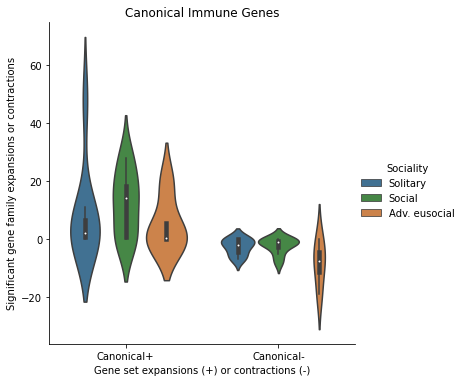

In [61]:
# Create an array with the colors you want to use
colors = ['#3374A0', '#3B923B', '#E18036']
# Set your custom color palette
sb.set_palette(sb.color_palette(colors))

hue_order = ['Solitary',  'Social','Adv. eusocial'] # Force to be coherent with others

canpltb=sb.catplot(x = "Change", y = 'value', hue = "Sociality",  hue_order=hue_order, kind = 'violin',   data = newcanLong, )
plt.title('Canonical Immune Genes')
plt.ylabel('Significant gene family expansions or contractions')
plt.xlabel('Gene set expansions (+) or contractions (-)')


In [62]:
socMean

,Canonical+,Canonical-,Non-Canonical+,Non-Canonical-,Background+,Background-,totUp,totDown
Sociality,,,,,,,,
Adv. eusocial,5.000,-8.500,22.000,-27.750,138.000,-142.500,165.000,-178.750
Social,12.250,-2.250,54.125,-12.000,354.625,-69.125,421.000,-83.375
Solitary,8.625,-2.625,26.250,-11.875,150.250,-59.875,185.125,-74.375


Text(0.5, 6.79999999999999, 'Gene set expansions (+) or contractions (-)')

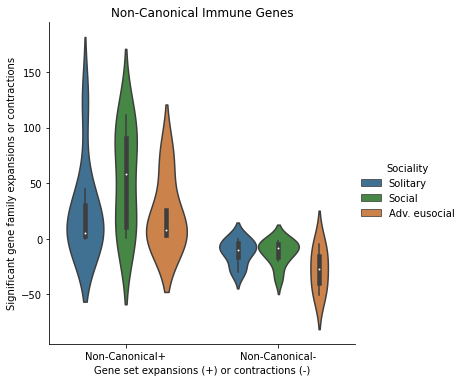

In [63]:
ncanpltb=sb.catplot(x = "Change", y = 'value', hue = "Sociality", hue_order=hue_order, kind = 'violin',  data = newnoncanLong, ) 
plt.title('Non-Canonical Immune Genes')
plt.ylabel('Significant gene family expansions or contractions')
plt.xlabel('Gene set expansions (+) or contractions (-)')


Text(0.5, 6.79999999999999, 'Gene set expansions (+) or contractions (-)')

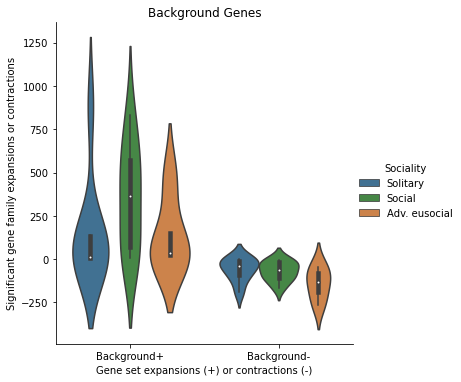

In [64]:
bgpltb=sb.catplot(x = "Change", y = 'value', hue = "Sociality", hue_order=hue_order, kind = 'violin',  data = newbackLong, ) 
plt.title('Background Genes')
plt.ylabel('Significant gene family expansions or contractions')
plt.xlabel('Gene set expansions (+) or contractions (-)')

In [65]:

canpltb.savefig(plotpath+"3LevelsCanonicalExpansion_Aug21.png")
ncanpltb.savefig(plotpath+'3LevelsNoncanonicalExpansion_Aug21.png')
bgpltb.savefig(plotpath+'3LevelsBackgroundExpansion_Aug21.png')



c:\Users\Seth\Dropbox\manualbackup\GitHub\Proj0_Analysis\CAFE5_Output\plots\


In [66]:
canpltb.savefig(plotpath+"3LevelsCanonicalExpansion_Aug21.svg")
ncanpltb.savefig(plotpath+'3LevelsNoncanonicalExpansion_Aug21.svg')
bgpltb.savefig(plotpath+'3LevelsBackgroundExpansion_Aug21.svg')